# Initial Setup

In [2]:
%matplotlib inline
import numpy as np
import keras
import matplotlib
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
from keras.engine import  Model
import itertools
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint

In [3]:
#train_path = 'DatasetOfRacesGender/train'
#valid_path = 'DatasetOfRacesGender/valid'
#test_path = 'DatasetOfRacesGender/test'

train_path = 'DatasetOfRaces/train'
valid_path = 'DatasetOfRaces/valid'
test_path = 'DatasetOfRaces/test'

In [4]:
#train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=50)
#valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=25)
#test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmericanMale', 'AfricanAmericanFemale', 'AsianMale', 'AsianFemale', 'CaucasianMale', 'CaucasianFemale', 'HispanicMale', 'HispanicFemale'], batch_size=40)

train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=50)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=25)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224, 224), classes=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic'], batch_size=40)

Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.
Found 40 images belonging to 4 classes.


In [5]:
def plots(ims, figsize=(40,24), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims)%2 == 0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

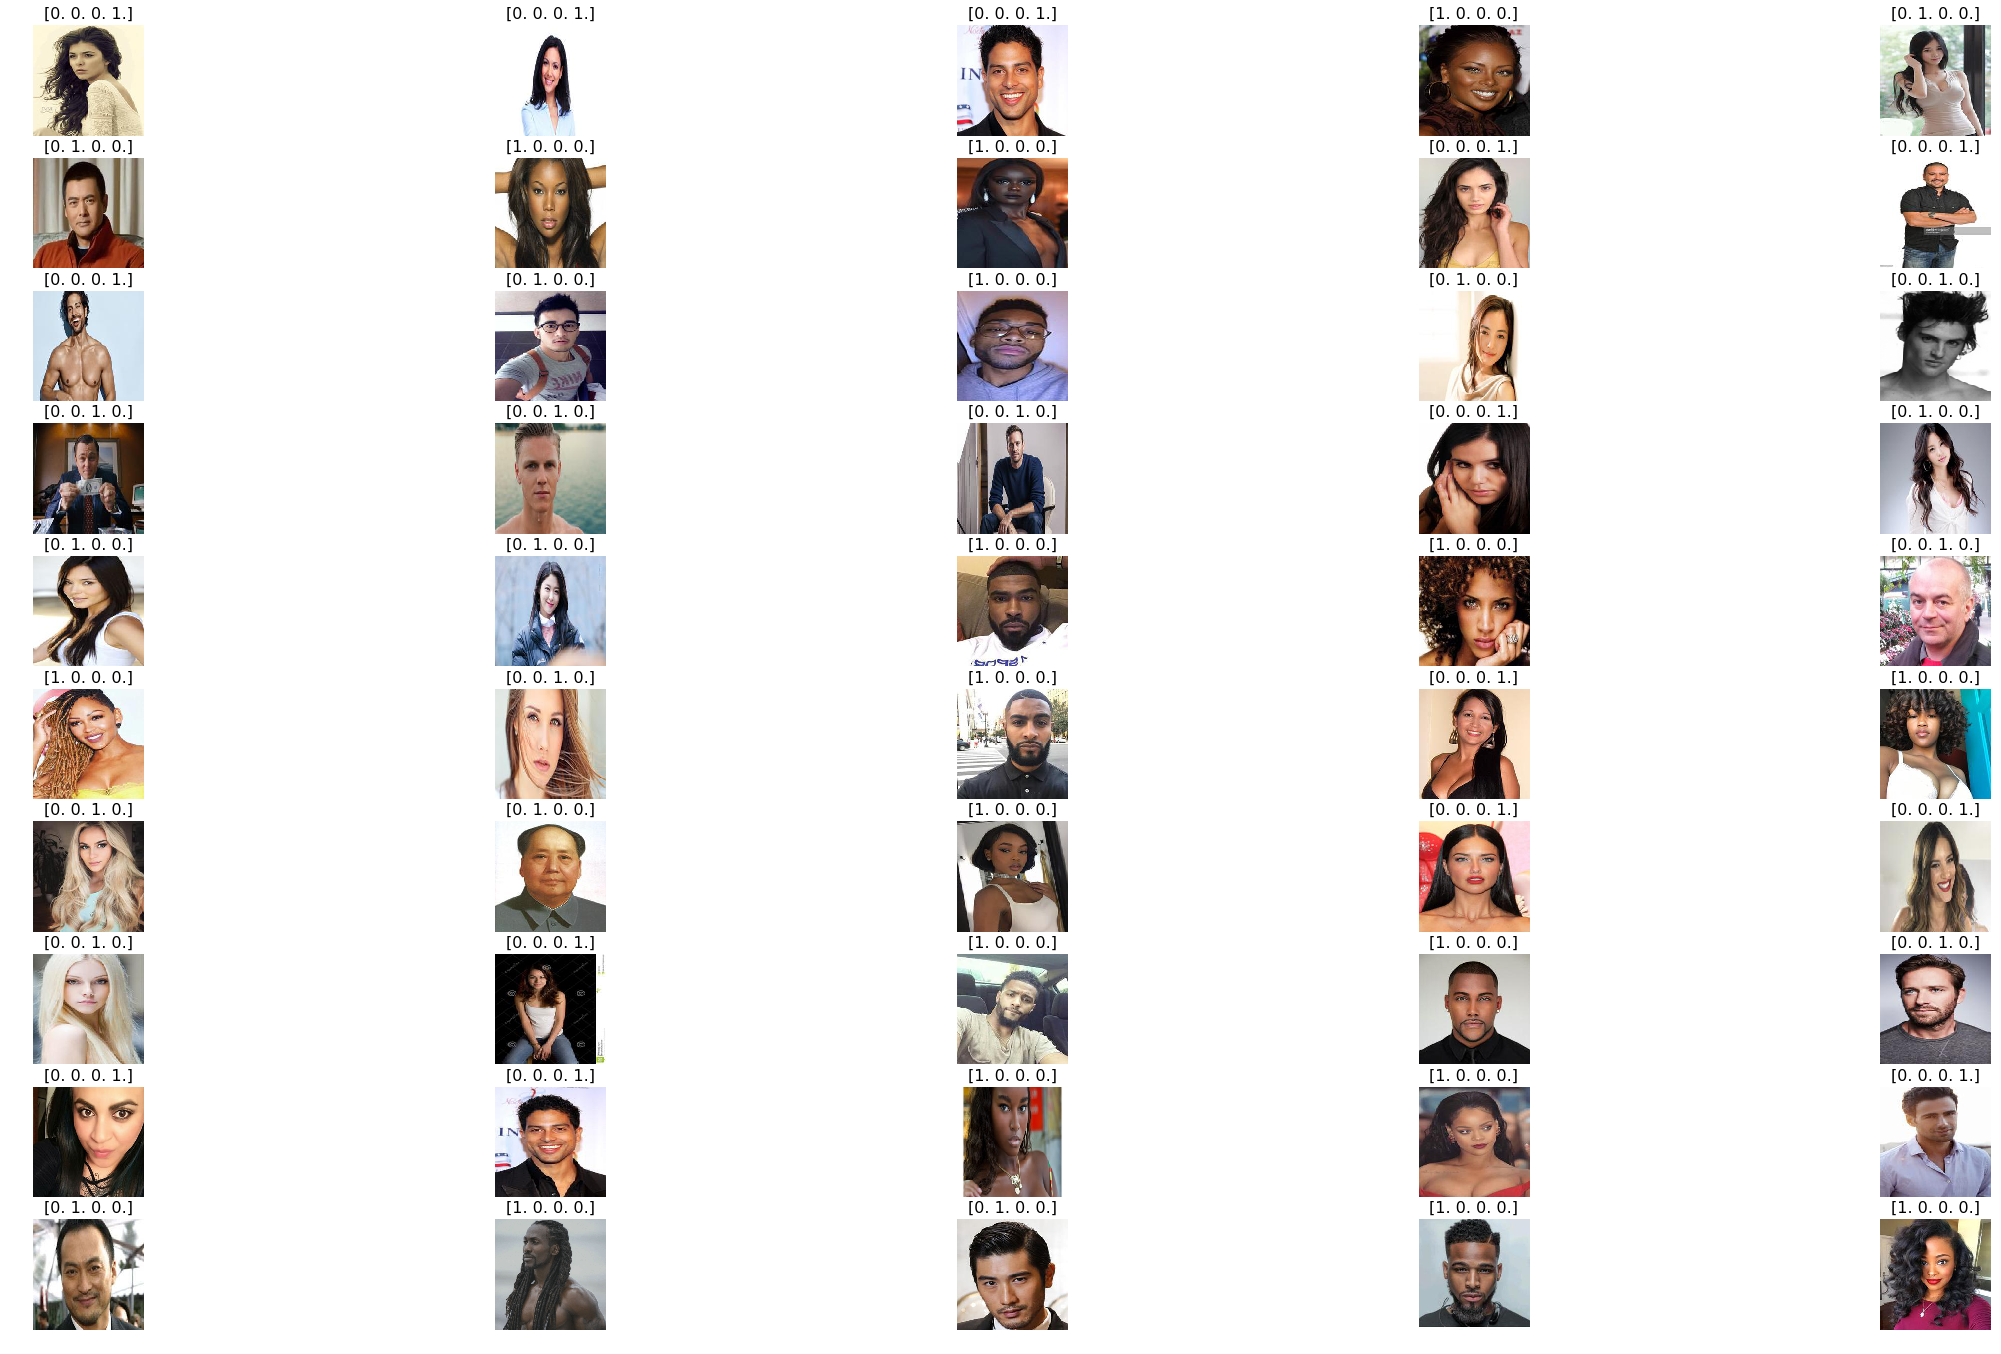

In [6]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

# Train, Predict, and Histogram Display

In [7]:
#model = Sequential([
#        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
#        Flatten(),
#        Dense(8, activation='softmax'),
#    ])

model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
        Flatten(),
        Dense(4, activation='softmax'),
    ])

In [8]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=10, verbose=2)

Epoch 1/10


/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7549727230 bytes but only got 0. Skipping tag 8
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 99877888 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 31197188 bytes but only got 0. Skipping tag 1029
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3

 - 8s - loss: 11.9917 - acc: 0.2525 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 2/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 3/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 4/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 5/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 6/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 7/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 8/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 9/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500
Epoch 10/10
 - 7s - loss: 12.0886 - acc: 0.2500 - val_loss: 12.0886 - val_acc: 0.2500


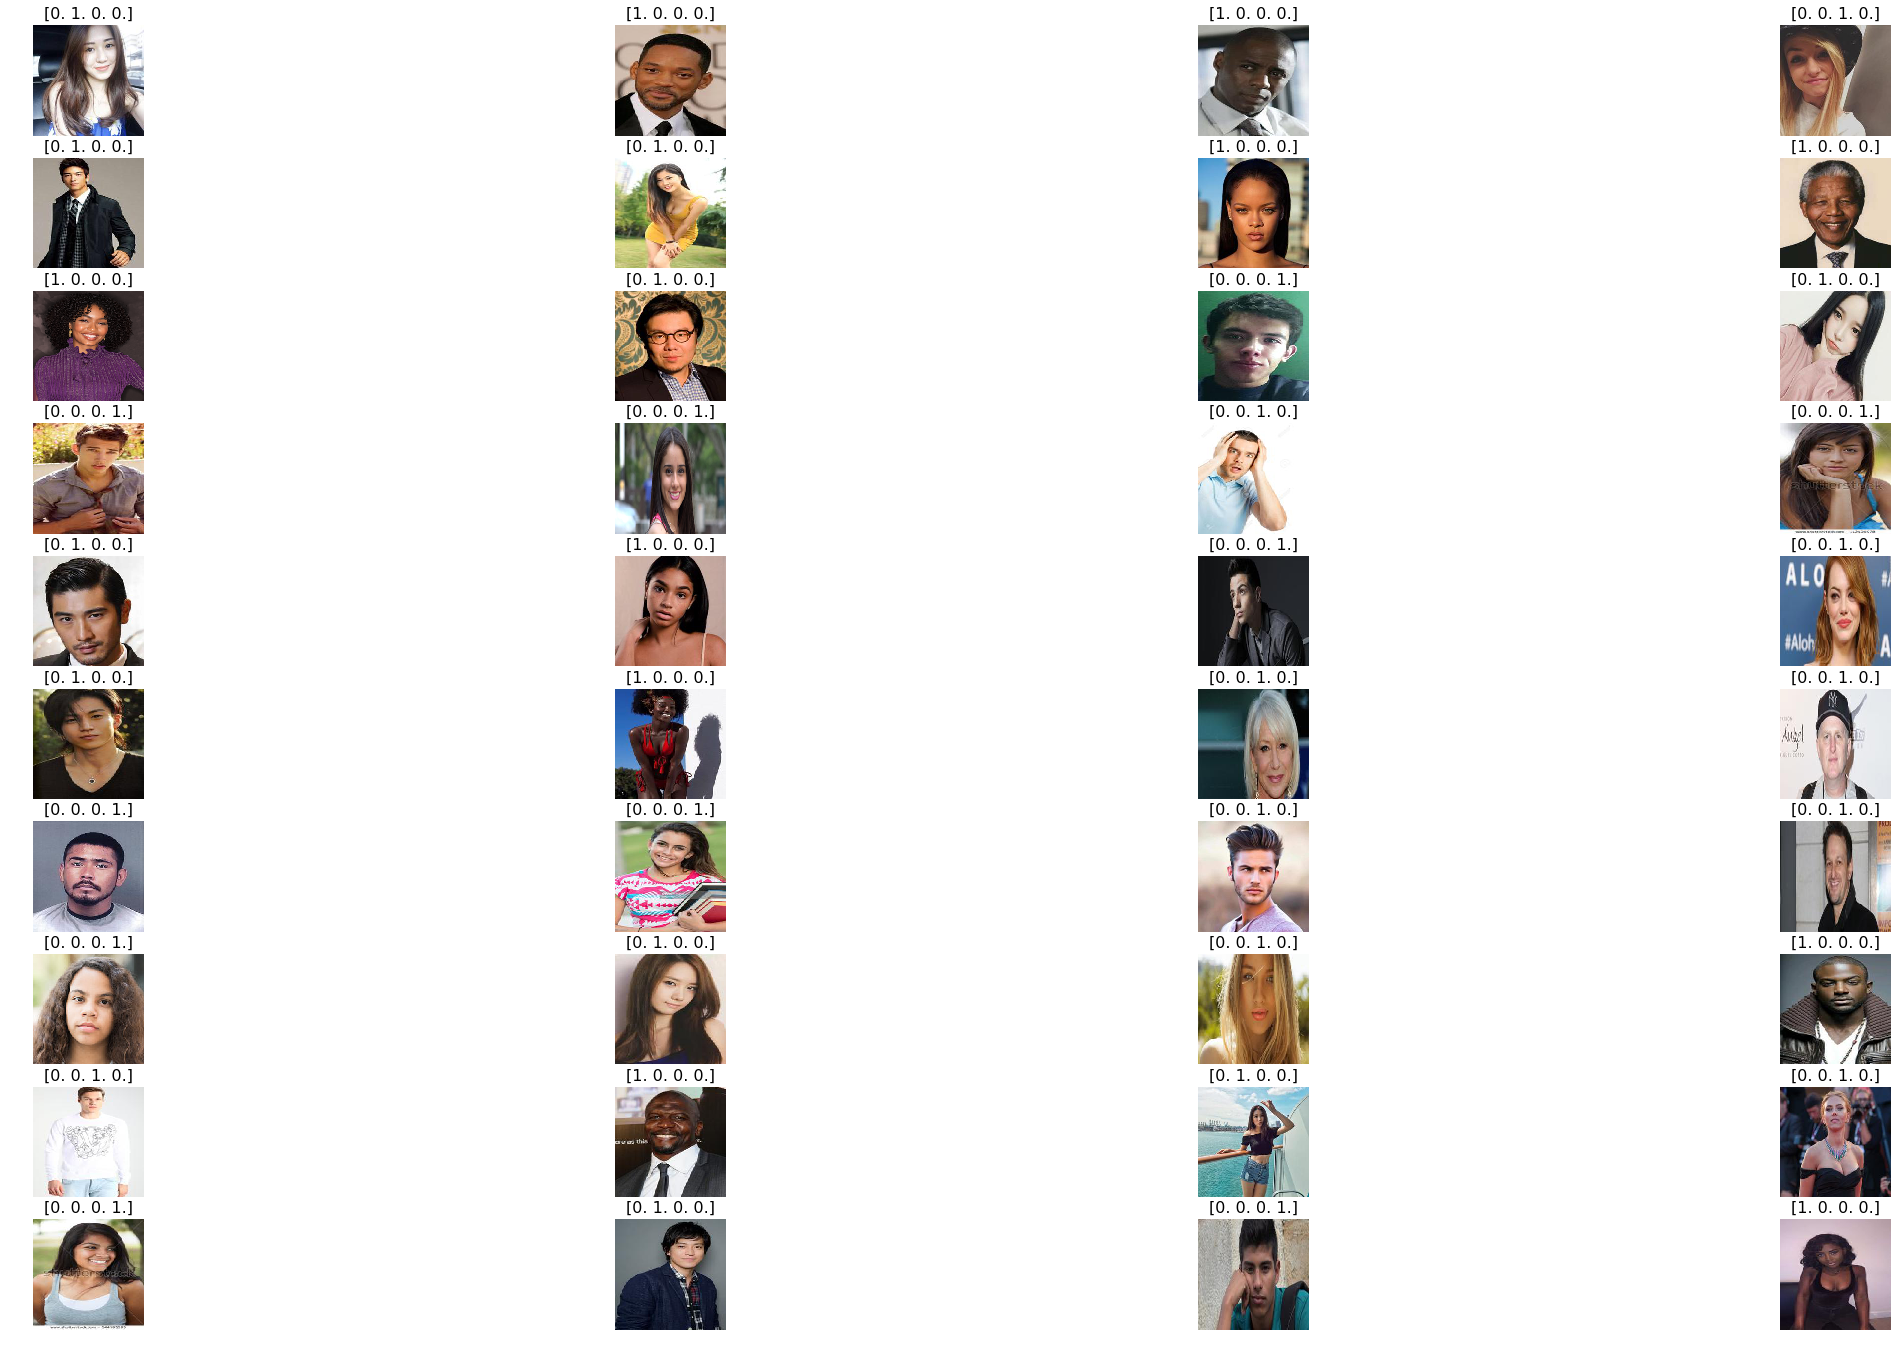

In [10]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [12]:
predictions

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [13]:
def plot_model(model_details):

    # Create sub-plots
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    
    # Summarize history for accuracy
    axs[0].plot(range(1,len(model_details.history['acc'])+1),model_details.history['acc'])
    axs[0].plot(range(1,len(model_details.history['val_acc'])+1),model_details.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_details.history['acc'])+1),len(model_details.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # Summarize history for loss
    axs[1].plot(range(1,len(model_details.history['loss'])+1),model_details.history['loss'])
    axs[1].plot(range(1,len(model_details.history['val_loss'])+1),model_details.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_details.history['loss'])+1),len(model_details.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    
    # Show the plot
    plt.show()

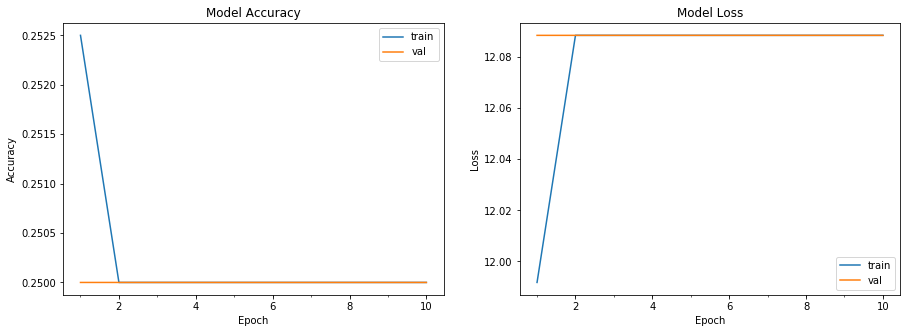

In [14]:
plot_model(model_details)

# VGG16 Build and Fine-tune

In [15]:
vgg16_model = keras.applications.vgg16.VGG16()

In [16]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [17]:
type(vgg16_model)

keras.engine.training.Model

In [18]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [20]:
model.layers.pop()

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [22]:
for layer in model.layers:
    layer.trainable = False

In [23]:
#model.add(Dense(8, activation='softmax'))

model.add(Dense(4, activation='softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

# VGG16 Train

In [25]:
model.compile(Adam(lr=.00001), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
model_details = model.fit_generator(train_batches, steps_per_epoch=8, 
                    validation_data=valid_batches, validation_steps=8, epochs=10, verbose=2)

Epoch 1/10


/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 285278993 bytes but only got 0. Skipping tag 290
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 403177488 bytes but only got 0. Skipping tag 65498
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:756: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 0. 
  warnings.warn(str(msg))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.py:739: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1681981440 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/home/acosta_ralph_d/anaconda3/lib/python3.5/site-packages/PIL/TiffImagePlugin.p

 - 84s - loss: 1.3873 - acc: 0.2475 - val_loss: 1.3896 - val_acc: 0.2500
Epoch 2/10
 - 84s - loss: 1.3866 - acc: 0.2550 - val_loss: 1.3895 - val_acc: 0.2500
Epoch 3/10
 - 83s - loss: 1.3859 - acc: 0.2625 - val_loss: 1.3894 - val_acc: 0.2450
Epoch 4/10
 - 83s - loss: 1.3853 - acc: 0.2675 - val_loss: 1.3893 - val_acc: 0.2400
Epoch 5/10
 - 83s - loss: 1.3847 - acc: 0.2700 - val_loss: 1.3893 - val_acc: 0.2400
Epoch 6/10
 - 83s - loss: 1.3841 - acc: 0.2825 - val_loss: 1.3892 - val_acc: 0.2450
Epoch 7/10
 - 83s - loss: 1.3835 - acc: 0.2975 - val_loss: 1.3891 - val_acc: 0.2400
Epoch 8/10
 - 84s - loss: 1.3829 - acc: 0.3025 - val_loss: 1.3890 - val_acc: 0.2350
Epoch 9/10
 - 83s - loss: 1.3822 - acc: 0.3125 - val_loss: 1.3889 - val_acc: 0.2350
Epoch 10/10
 - 84s - loss: 1.3816 - acc: 0.3325 - val_loss: 1.3888 - val_acc: 0.2250


# VGG16 Predict and Histogram Display

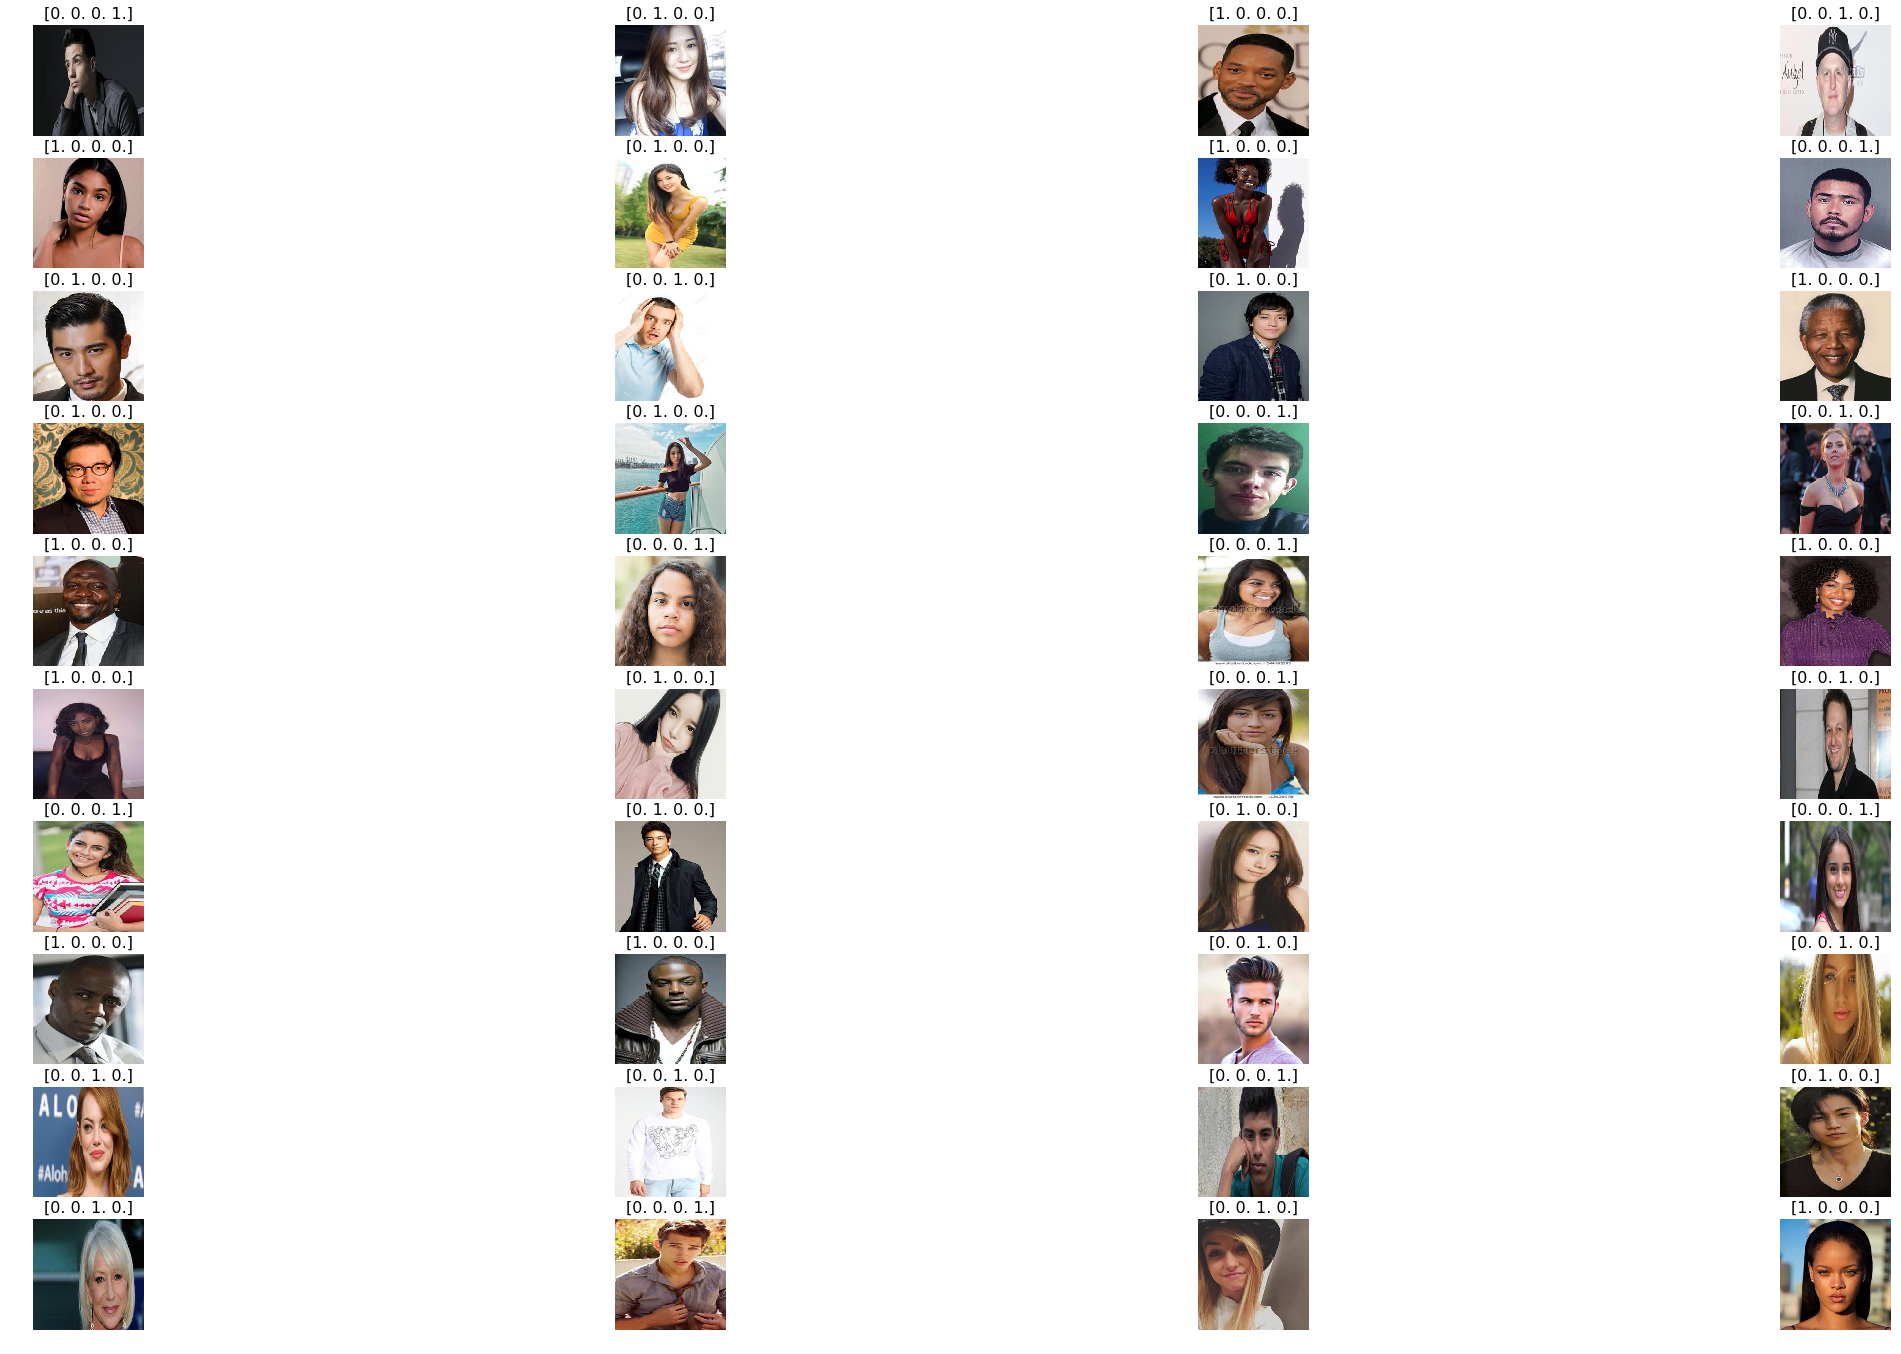

In [27]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [28]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [29]:
predictions

array([[0.24939772, 0.25020367, 0.25136042, 0.24903817],
       [0.25734273, 0.25575572, 0.24842164, 0.23847993],
       [0.24606028, 0.24320695, 0.25287974, 0.25785306],
       [0.25162074, 0.24735048, 0.2517014 , 0.24932742],
       [0.25205904, 0.24876674, 0.2500927 , 0.24908148],
       [0.2535948 , 0.2508538 , 0.2444451 , 0.25110623],
       [0.24965347, 0.25041556, 0.24113652, 0.25879437],
       [0.25047356, 0.2495345 , 0.250316  , 0.24967599],
       [0.24506634, 0.24018773, 0.25315008, 0.26159588],
       [0.2508953 , 0.25416175, 0.25100726, 0.24393567],
       [0.25294426, 0.2502302 , 0.24817696, 0.24864857],
       [0.24768619, 0.24640122, 0.2522314 , 0.25368124],
       [0.24741456, 0.24613254, 0.25288433, 0.25356862],
       [0.25249398, 0.24609542, 0.25212502, 0.2492856 ],
       [0.24777207, 0.2505524 , 0.25327   , 0.24840556],
       [0.2519724 , 0.25028464, 0.24879318, 0.24894984],
       [0.23744072, 0.23918349, 0.2619221 , 0.26145375],
       [0.25829235, 0.2538804 ,

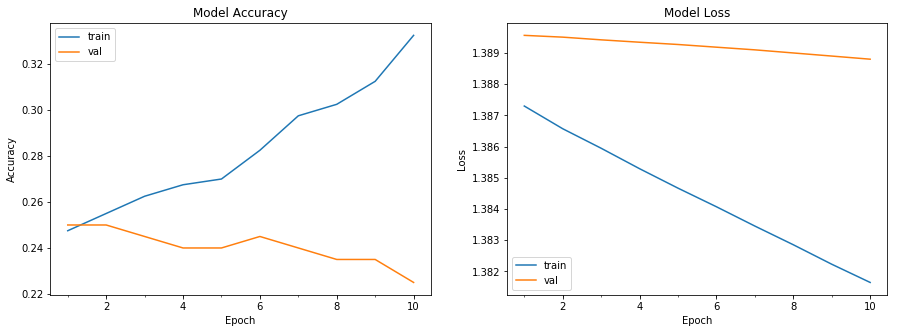

In [30]:
plot_model(model_details)